### Lab 3 : Asking Statistical Questions

This week we are going to concentrate on asking a statistical question. This process almost always consists of 3+ steps:

1) Writing down in words very precisely what question you are trying to ask. <br>
2) Translating the precise english question into a mathematical expression. This often includes determining the pdf of the background (possibly including trials), and the to integral to do to obtain a probability. <br>
3) Coverting the probability into equivalent sigma. <br>
So in this lab we will assume that we know the form of the signal-free background distribution (determining a distribution from data will be next week's lab). In each of our three examples, your task will be to state the statistical question, convert it to math, then perform the associated analyses.

<br> <br> <b>Problem 1 </b> <br>
In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

In [18]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (6,4)

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

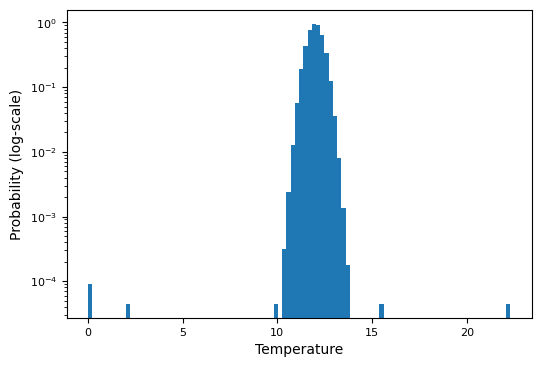

In [19]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 8)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
ax.set_xlabel("Temperature")
ax.set_ylabel("Probability (log-scale)")
plt.show()

A) So our goal is to identify bad data and throw it out.<br>

Start by exploring the data you have created with appropriate plots
State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
Restate your question in math. Be very clear.
Apply your statistical test and construct a truth table.

<b> Statistical Question </b>
How likely is our apparatus to register a value within 5 sigma of the mean? <br> <br> <u> Answer </u> <br>
5 sigma corresponds to 0.4*5 = 2 kelvin deviations from the mean. Thus, the bounds of our Gaussian are 10 and 14. 

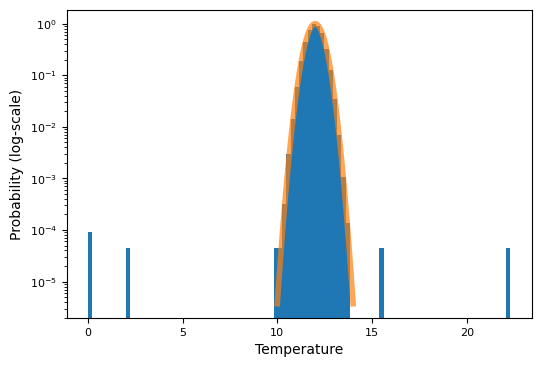

In [32]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 8)
x = np.linspace(10,14,1000)
ax.plot(x,stats.norm.pdf(x,loc = 12, scale = 0.4),linewidth = 4,alpha = 0.7)
ax.set_yscale("log")
ax.set_xlabel("Temperature")
ax.set_ylabel("Probability (log-scale)")
plt.show()

<b> Our Test </b>


Our test first removes all outliers that are defined as points outside the bounds 10 <x< 14. We then fit a Gaussian to the data and the 

In [36]:
data= d
l_bound,u_bound=10,14
test=data[np.where((data > l_bound) & (data < u_bound))]

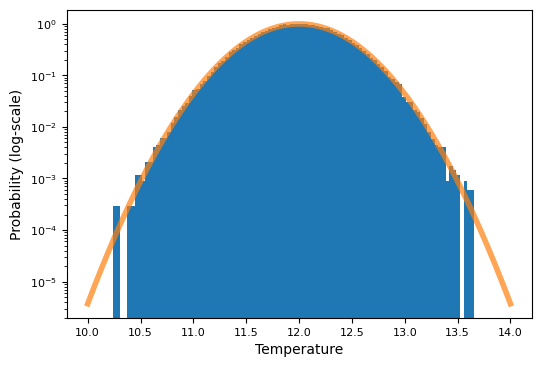

In [38]:
plot_test = test
fig, ax = plt.subplots(1, 1)
ax.hist(plot_test,100, density=True)
plt.tick_params(labelsize = 8)
x = np.linspace(10,14,1000)
ax.plot(x,stats.norm.pdf(x,loc = 12, scale = 0.4),linewidth = 4,alpha = 0.7)
ax.set_yscale("log")
ax.set_xlabel("Temperature")
ax.set_ylabel("Probability (log-scale)")
plt.show()

In [51]:
len_test,len_data=len(test),len(data)
#Number of noise points= 8 
#Number of noise points thrown out = 6
#Number of noise points retained = 2
#Number of good points= 100000
#Number of good points thrown out= 0 
good_gaussian=stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
good_gaussian_kept=np.where((good_gaussian > l_bound) & (good_gaussian < u_bound))
len(list(good_gaussian_kept[0]))

100000

#Temperature readings thrown out = 6 <br>
#Temperature readings within bounds that are incorrect = 2 <br>
#Total number of points retained = len_test <br>
#Original number of points = len_data

|     |<b> True T </b> | <b> Bad T </b> | 
| --- | --- | --- |
| Your Test Good | 100000 | 2 |
| Your Test Bad | 0 | 6 |

<u> Question </u> <br>
B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

<u> Answer </u> <br>
The number of omissions <b> increasses </b> as we decrease the threshold. Yes, it is a predictable quantity since the ideal distribution still follows a Gaussian and we can calculate the probability assiciated with different sigma (by finding cdf). 

<u> Question </u> <br>
C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

<u> Answer </u> <br>

Yes, bad data gets in. This can be managed by reducing sigma but not completely avoided by this method. If there is noise at 12 kelvin, that cannot be removed by the sigma method. Additionally, reducing sigma also removes good data. 

### Problem 2
In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:

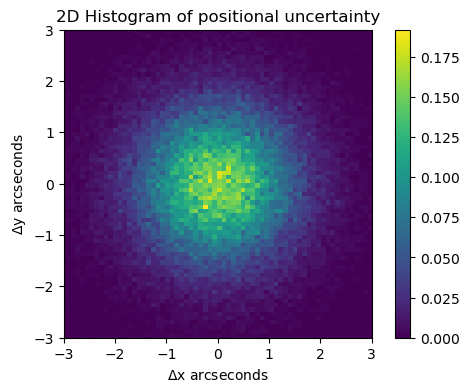

In [57]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty")
plt.ylabel("$\Delta$y arcseconds")
plt.xlabel("$\Delta$x arcseconds")
plt.colorbar(h[3], ax=ax)

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds? <br>

What is the question in words? <br>
What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.] <br>
What distance in arcseconds represents a 5 sigma detection of motion? <br>